In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
from sklearn.decomposition import PCA
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [4]:
fw_people = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)
n_samples, h_pix, w_pix = fw_people.images.shape
X_train, X_test, y_train, y_test = train_test_split(fw_people.data,fw_people.target,test_size=0.3,random_state=8)

In [5]:
# define n_component

n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h_pix, w_pix))

In [6]:
#PCA X_train & X_test

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)#(798,100)

(798, 100)


In [7]:
# print acc from training this model

neighbors = fw_people.target_names.size
model_knn = KNeighborsClassifier(n_neighbors=neighbors)
classifier = model_knn.fit(X_train_pca, y_train)

ypred_test = model_knn.predict(X_test_pca)
class_names = fw_people.target_names

acc = format(accuracy_score(y_test, ypred_test), '0.2%')
print("Accuracy: ",acc)


Accuracy:  72.22%


In [8]:
#read image to predict
img = Image.open("ColinPowell.png")
#img = Image.open("koizumi.png")
#img = Image.open("bush.png")

In [9]:
#resize to same dimension
resized_img = img.resize((h_pix, w_pix)).convert("L")

In [10]:
#prepare data for predict

img_data = np.asarray(resized_img)
img_data = np.array(img_data).reshape(1, -1)#(1,1850)
img_pca = pca.transform(img_data)#(1,150)
print(img_pca.shape)

(1, 100)


Picture of  ['Colin Powell']
[[ 43   3  10   1   6]
 [  6  18  14   0   2]
 [  3  10 155   2   5]
 [  5   2   7  10   3]
 [  0   1  14   1  21]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.72        63
           1       0.53      0.45      0.49        40
           2       0.78      0.89      0.83       175
           3       0.71      0.37      0.49        27
           4       0.57      0.57      0.57        37

    accuracy                           0.72       342
   macro avg       0.67      0.59      0.62       342
weighted avg       0.72      0.72      0.71       342



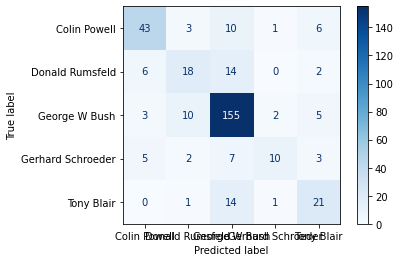

In [11]:
#predict
output_class = model_knn.predict(img_pca)

#print(output_class)
print("Picture of ",class_names[output_class])

#print matrix
disp = plot_confusion_matrix(classifier, X_test_pca, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)
print(classification_report(y_test,ypred_test))

In [12]:
# create function plot_gallery

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)

        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plt.show()

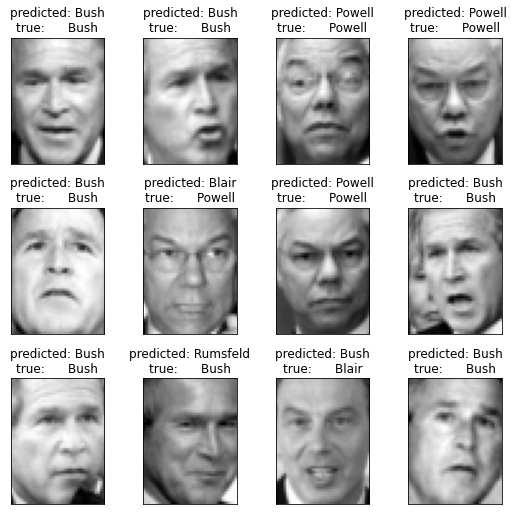

In [13]:
# plot the result of the prediction

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(ypred_test, y_test, class_names, i)
                     for i in range(ypred_test.shape[0])]

plot_gallery(X_test, prediction_titles, h_pix, w_pix)


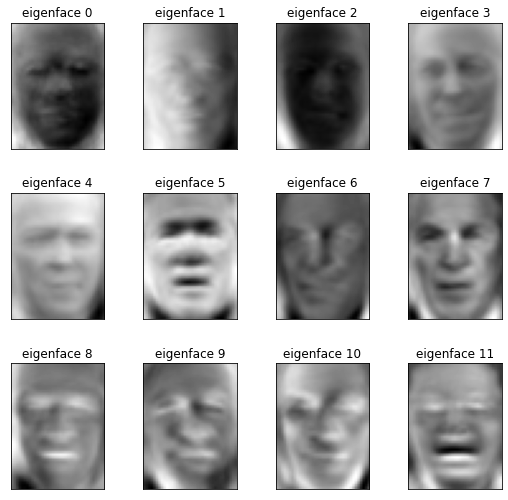

In [14]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h_pix, w_pix)

plt.show()